##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [1]:
import pandas as pd
import json

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
df.head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
0,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,2.0,1488791047953,1,Guangzhou,baidu,cpc,others,0,2,0
1,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,chrome,56.0,2017-03-06,True,True,111.204.198.242,NaN,NaN,...,NaN,1488791050856,0,0,sensordata,ukmedium,ukcontent,0,21,0
2,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,NaN,1488791051772,1,Beijing,sensordata,ukmedium,ukcontent,0,21,0
3,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,chrome,56.0,2017-03-06,True,False,111.204.198.242,NaN,NaN,...,NaN,1488791056032,1,Beijing,sensordata,ukmedium,ukcontent,0,21,0
4,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,chrome,56.0,2017-03-06,True,False,219.135.131.99,baidu,cpc,...,1.0,1488791057880,1,Beijing,baidu,cpc,others,0,2,0


In [5]:
df.shape

(65673, 25)

In [7]:
avg_st = df[['dist_id','pageS']].groupby(['dist_id']).median()

In [8]:
avg_st[0:5]

,pageS
dist_id,
00007ef910b6c9911f1b89d01a09aa3fc862f4a9,NaN
000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,921142.371
000c46a27ef69fa22b56d253a9c72773338a1686,2586.546
000ed1dcd942969b458c5b308937c6389c08f999,30.680
00111feff544ef5280a4c7064a362a9ea59c9389,NaN


In [9]:
df.groupby(["dist_id"]).apply(lambda x: x.sort_values(["time"], ascending = True)).reset_index(drop=True)
#df.sort_values(['time','dist_id'], ascending=True).groupby(['dist_id']).head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,$pageview,qq,7.30000,2017-03-06,False,True,36.23.47.33,baidu,mcpc,...,NaN,1488865937039,1,Shanghai,baidu,others,others,0,6,1
1,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,btnClick,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865940372,1,Shanghai,baidu,others,others,0,6,1
2,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,click_send_cellphone,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865949692,1,Beijing,baidu,others,others,0,6,1
3,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,click_send_cellphone,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865956872,0,Chicago,baidu,others,others,0,6,1
4,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865970389,1,Hangzhou,baidu,others,others,0,6,1
5,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,verify_cellphone_code,qq,7.30000,2017-03-06,True,False,36.23.47.33,baidu,mcpc,...,NaN,1488865971618,1,Hangzhou,baidu,others,others,0,6,1
6,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,chrome,56.00000,2017-03-12,False,False,111.193.183.253,baidu,cpc,...,1.0,1489373568278,1,Guangzhou,baidu,cpc,others,1,1,0
7,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,chrome,56.00000,2017-03-06,True,True,27.38.250.222,NaN,NaN,...,NaN,1488865745811,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
8,000c46a27ef69fa22b56d253a9c72773338a1686,btnClick,chrome,56.00000,2017-03-06,True,False,27.38.250.222,NaN,NaN,...,NaN,1488865751642,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
9,000c46a27ef69fa22b56d253a9c72773338a1686,index_leave,chrome,56.00000,2017-03-06,True,False,27.38.250.222,NaN,NaN,...,1.0,1488865751647,1,Shanghai,sensordata,ukmedium,ukcontent,0,22,0


In [19]:
count = []
npage = []
nclick = []
ileave = []
df_new = pd.DataFrame()
grouped = df.groupby('dist_id')
for name, group in grouped:
    ct = 0
    page = 0
    click = 0
    leave = 0
    for index, row in group.iterrows():
        if group.event[index] != "formSubmit" and ct != group.shape[0]-1:
            ct+=1
            if group.event[index] == "index_leavet":
                leave+=1
            if group.event[index] == "$pageview":
                page+=1
            if group.event[index] == "btnClick":
                click+=1     
        else:
            df_new = df_new.append(group.loc[index])
            ct+=1
            if group.event[index] == "index_leave":
                leave+=1
            if group.event[index] == "$pageview":
                page+=1
            if group.event[index] == "btnClick":
                click+=1   
            count.append(ct)
            npage.append(page)
            nclick.append(click)
            ileave.append(leave)
            break

In [20]:
df_new[['time','day','dist_id','freq','event']].head()

,time,day,dist_id,freq,event
6051,1.488866e+12,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,6.0,formSubmit
46921,1.489374e+12,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1.0,index_leave
7243,1.488871e+12,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,22.0,$pageview
47483,1.489376e+12,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,4.0,$pageview
28974,1.489059e+12,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,1.0,$pageview


In [25]:
#df_first=df.groupby(["dist_id"]).apply(lambda x: x.sort_values(["time"], ascending = True)).head(1)
df_first = df.sort_values(['dist_id','time'],ascending=True).groupby('dist_id').head(1)

In [26]:
df_first.head()

,dist_id,event,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,latest_utm_m,...,pageP,time,CN,CT,source,medium,content,weekend,freq,signup
6031,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,$pageview,qq,7.3,2017-03-06,False,True,36.23.47.33,baidu,mcpc,...,NaN,1488865937039,1,Shanghai,baidu,others,others,0,6,1
46921,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,chrome,56.0,2017-03-12,False,False,111.193.183.253,baidu,cpc,...,1.0,1489373568278,1,Guangzhou,baidu,cpc,others,1,1,0
5997,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,chrome,56.0,2017-03-06,True,True,27.38.250.222,NaN,NaN,...,NaN,1488865745811,1,Beijing,sensordata,ukmedium,ukcontent,0,22,0
47459,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,qq,9.5,2017-03-12,True,True,116.226.32.214,sanjieke.cn,NaN,...,NaN,1489375777008,1,Wuhan,others,ukmedium,ukcontent,1,4,0
28974,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,safari,9.0,2017-03-09,True,True,117.136.38.216,baidu,mcpc,...,NaN,1489059275387,1,Chengdu,baidu,others,others,0,1,0


In [38]:
df_new['Ttoend'] = df_new['time'].values-df_first['time'].values

In [39]:
df_new['Ttoend'].head()

6051       33350.0
46921          0.0
7243     4977084.0
47483      35577.0
28974          0.0
Name: Ttoend, dtype: float64

In [40]:
df_new['count'] = count

In [41]:
df_new['npage'] = npage

In [42]:
df_new['nclick'] = nclick

In [43]:
df_new['ileave'] = ileave

In [44]:
df_new['avg_st'] = avg_st.values

In [45]:
df_new.shape

(11708, 31)

In [46]:
df_new

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,signup,source,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st
6051,1.0,Hangzhou,qq,7.30000,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,1.0,baidu,1.488866e+12,0.0,33350.0,5,1,1,0,NaN
46921,1.0,Guangzhou,chrome,56.00000,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,0.0,baidu,1.489374e+12,1.0,0.0,1,0,0,1,921142.3710
7243,1.0,Shenzhen,chrome,56.00000,ukcontent,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0.0,sensordata,1.488871e+12,0.0,4977084.0,22,6,9,0,2586.5460
47483,1.0,Hangzhou,qq,9.50000,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0.0,others,1.489376e+12,1.0,35577.0,4,2,1,0,30.6800
28974,1.0,Chengdu,safari,9.00000,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0.0,baidu,1.489059e+12,0.0,0.0,1,1,0,0,NaN
22480,1.0,Zhengzhou,chrome,56.00000,others,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,0.0,baidu,1.489029e+12,0.0,33799.0,6,3,2,0,4.1700
3663,0.0,Nonthaburi,chrome,56.00000,others,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,0.0,baidu,1.488851e+12,0.0,32655.0,2,1,0,1,35.7470
28509,1.0,Beijing,na,-1.00000,others,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,0.0,baidu,1.489055e+12,0.0,17025.0,3,1,1,1,18.9160
21090,1.0,NaN,micromessenger,6.50000,ukcontent,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,0.0,sensordata,1.489022e+12,0.0,35091.0,3,2,1,0,NaN
39158,1.0,Wuhan,qq,6.00000,others,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,0.0,baidu,1.489157e+12,0.0,0.0,1,1,0,0,NaN


In [47]:
df_new.shape

(11708, 31)

In [48]:
df_new.isnull().sum()

CN                       0
CT                     168
browser                  0
browser_v                0
content                  0
day                      0
dist_id                  0
event                    0
freq                     0
ip                       0
is_fd                    0
is_ft                    0
latest_utm_content    4586
latest_utm_m          4488
latest_utm_s          4395
medium                   0
model                    0
os                       0
os_version               0
pageP                 6190
pageS                 6137
signup                   0
source                   0
time                     0
weekend                  0
Ttoend                   0
count                    0
npage                    0
nclick                   0
ileave                   0
avg_st                4296
dtype: int64

## Dataset Description

- browser
- browser version
- cost per click: source medium 
- the day of this event
- is first day
- is first time
- event
- frequency (total)
- utm_source
- utm_medium
- ip address
- user source
- model (pc or mac or cellphone)
- operation system
- os version
- page stay time
- time 
- is ip address in China
- ip address location city
- is the time in weekend
- did the user sign up 
- count user interactions before form submit
- count number of events (including page view, btnclick and index leave) before form submit
- calculate the time from first use to form submit
- average stay time on page

Explore data

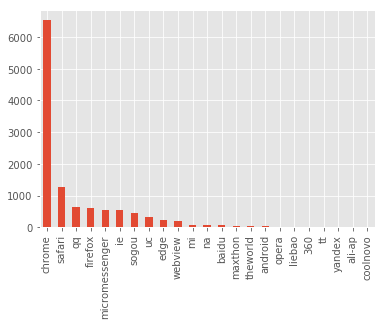

In [49]:
df_new['browser'].value_counts(dropna=False).plot.bar()

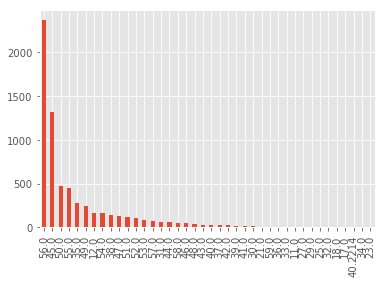

In [50]:
df_new.loc[df['browser'] == 'chrome']['browser_v'].value_counts(dropna=False).plot.bar()

In [51]:
df_new['browser_chrome'] = np.where(df_new['browser'] == 'chrome', '1', '0')

In [52]:
df_new['browser_chrome'].value_counts(dropna=False)

1    6531
0    5177
Name: browser_chrome, dtype: int64

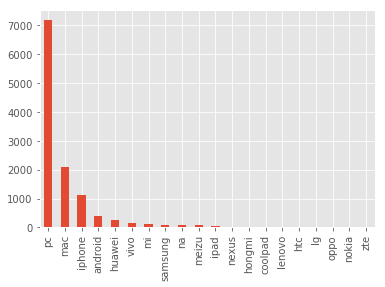

In [53]:
df_new['model'].value_counts(dropna=False).plot.bar()

In [54]:
df_new['model_bin'] = df_new['model'] 

In [55]:
df_new.model_bin[~df_new.model.isin(['pc','mac'])] = 'others'

#s[s.index.isin([2, 4, 6])]

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_new['model_bin'].value_counts(dropna=False)

pc        7178
others    2439
mac       2091
Name: model_bin, dtype: int64

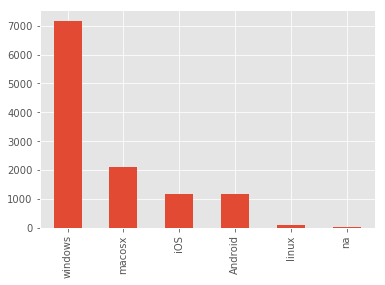

In [57]:
df_new['os'].value_counts(dropna=False).plot.bar()

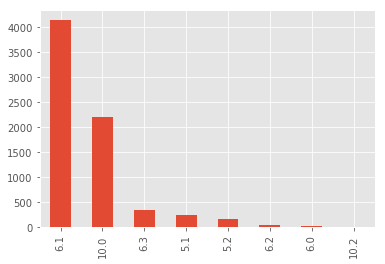

In [58]:
df_new.loc[df['os'] == 'windows']['os_version'].value_counts(dropna=False).plot.bar()

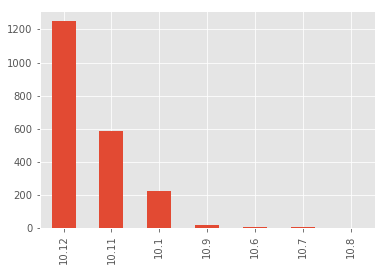

In [59]:
df_new.loc[df['os'] == 'macosx']['os_version'].value_counts(dropna=False).plot.bar()

In [60]:
df_new['os_bin'] = df_new['os'] 

In [61]:
df_new.os_bin[~df_new.os.isin(['windows','macosx'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_new['os_bin'].value_counts(dropna=False)

windows    7178
others     2439
macosx     2091
Name: os_bin, dtype: int64

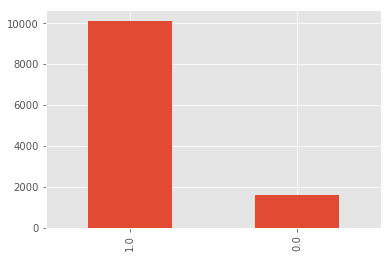

In [63]:
df_new['CN'].value_counts(dropna=False).plot.bar()

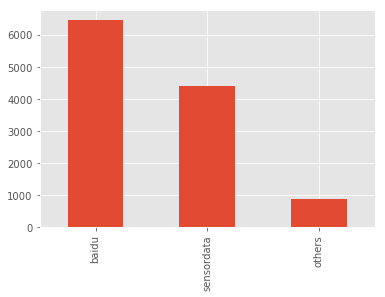

In [64]:
df_new['source'].value_counts(dropna=False).plot.bar()

might need to change source, create another value for nan: these people might already know sensordata, and go to the website directly.

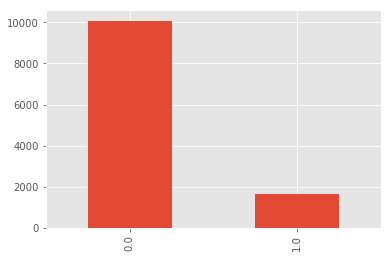

In [65]:
df_new['weekend'].value_counts(dropna=False).plot.bar()

Most people know or check this website for work. The number of interactions on weekends is small.

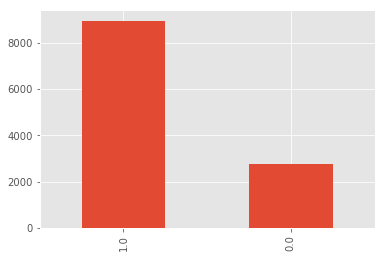

In [66]:
df_new['is_fd'].value_counts(dropna=False).plot.bar()

Some people come the other day

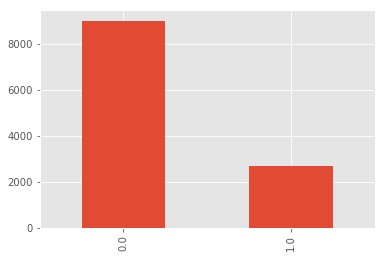

In [67]:
df_new['is_ft'].value_counts(dropna=False).plot.bar()

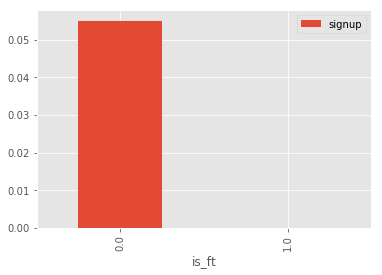

In [68]:
df_new[['is_ft', 'signup']].groupby(['is_ft']).mean().plot.bar()

## Clean data - dealing with missing values

In [69]:
# Count missing values by column
df_new.isnull().sum()

CN                       0
CT                     168
browser                  0
browser_v                0
content                  0
day                      0
dist_id                  0
event                    0
freq                     0
ip                       0
is_fd                    0
is_ft                    0
latest_utm_content    4586
latest_utm_m          4488
latest_utm_s          4395
medium                   0
model                    0
os                       0
os_version               0
pageP                 6190
pageS                 6137
signup                   0
source                   0
time                     0
weekend                  0
Ttoend                   0
count                    0
npage                    0
nclick                   0
ileave                   0
avg_st                4296
browser_chrome           0
model_bin                0
os_bin                   0
dtype: int64

In [71]:
df_new['CT_bin'] = df_new['CT']

In [72]:
df_new.CT_bin[~df_new.CT.isin(['Beijing','Shanghai','Guangzhou'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_new['CT_bin'].value_counts(dropna=False)

others       5292
Beijing      4041
Shanghai     1219
Guangzhou    1156
Name: CT_bin, dtype: int64

In [74]:
import geoip2.database
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-City_20180206/GeoLite2-City.mmdb')

In [75]:
# too many cities, use province to do analysis
PRO=[]
for index, row in df_new.iterrows():
    try:
        PRO.append(reader.city(df_new.loc[index,'ip']).subdivisions.most_specific.iso_code) 
    except:
        PRO.append('0')

In [76]:
df_new['PRO'] = PRO

In [77]:
df_new['PRO_bin'] = df_new['PRO']

In [78]:
df_new.PRO_bin[~df_new.PRO.isin(['BJ','GD','SH','ZJ'])] = 'others'

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_new['PRO_bin'].value_counts(dropna=False)

BJ        4014
others    2832
GD        2430
SH        1388
ZJ        1044
Name: PRO_bin, dtype: int64

In [80]:
df_new.describe()

,CN,browser_v,freq,is_fd,is_ft,os_version,pageP,pageS,signup,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5518.000000,5.571000e+03,11708.000000,1.170800e+04,11708.000000,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.00000,7.412000e+03
mean,0.864622,33.023361,5.609242,0.764178,0.229587,7.753071,1.784523,1.009756e+04,0.042450,1.489164e+12,0.139136,2.809726e+07,4.987444,2.554920,1.039716,0.36411,7.209755e+03
std,0.342141,21.660523,10.500759,0.424529,0.420585,2.205608,0.968303,6.525297e+04,0.201621,2.263144e+08,0.346103,1.026529e+08,9.048549,4.609698,2.484745,0.48120,6.471723e+04
min,0.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,3.300000e-02,0.000000,1.488791e+12,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,3.300000e-02
25%,1.000000,9.500000,1.000000,1.000000,0.000000,6.100000,1.000000,7.478000e+00,0.000000,1.488965e+12,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.00000,7.744750e+00
50%,1.000000,45.000000,2.000000,1.000000,0.000000,6.200000,1.000000,2.704500e+01,0.000000,1.489130e+12,0.000000,1.871450e+04,2.000000,1.000000,0.000000,0.00000,2.283800e+01
75%,1.000000,55.000000,5.000000,1.000000,0.000000,10.000000,2.000000,5.896960e+02,0.000000,1.489391e+12,0.000000,4.547025e+05,5.000000,2.000000,1.000000,1.00000,1.839218e+02
max,1.000000,59.000000,254.000000,1.000000,1.000000,10.900000,4.000000,1.749192e+06,1.000000,1.489517e+12,1.000000,7.101324e+08,254.000000,152.000000,69.000000,1.00000,2.918014e+06


### Explore sign up rate split by features 

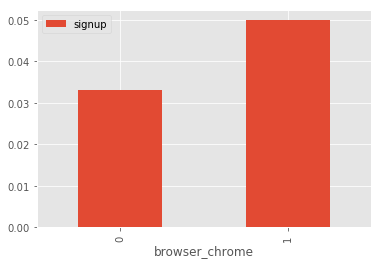

In [81]:
df_new[['browser_chrome', 'signup']].groupby(['browser_chrome']).mean().plot.bar()

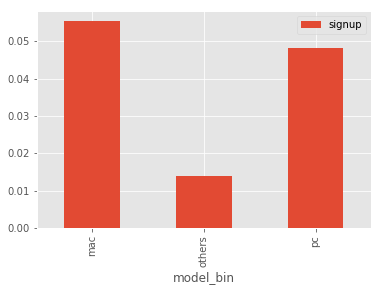

In [82]:
df_new[['model_bin', 'signup']].groupby(['model_bin']).mean().plot.bar()

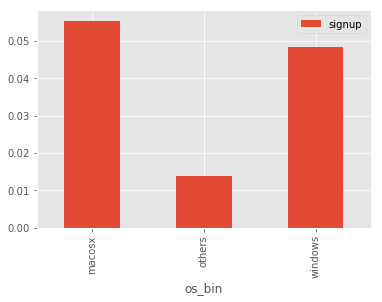

In [83]:
df_new[['os_bin', 'signup']].groupby(['os_bin']).mean().plot.bar()

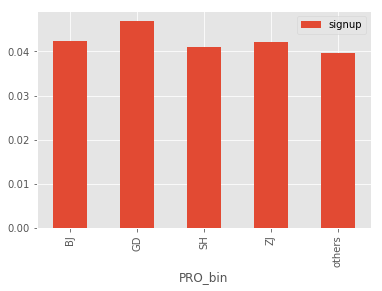

In [84]:
df_new[['PRO_bin', 'signup']].groupby(['PRO_bin']).mean().plot.bar()

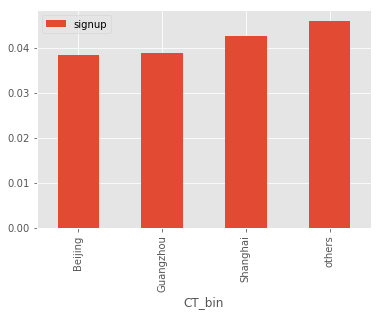

In [85]:
df_new[['CT_bin', 'signup']].groupby(['CT_bin']).mean().plot.bar()

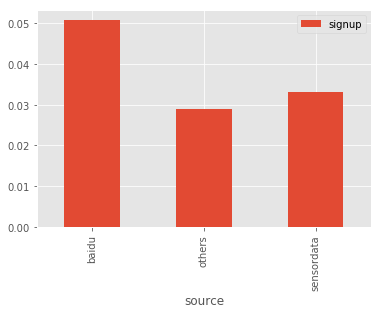

In [86]:
df_new[['source', 'signup']].groupby(['source']).mean().plot.bar()

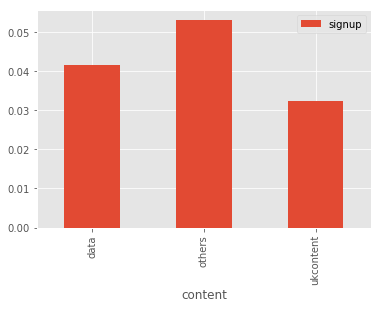

In [87]:
df_new[['content', 'signup']].groupby(['content']).mean().plot.bar()

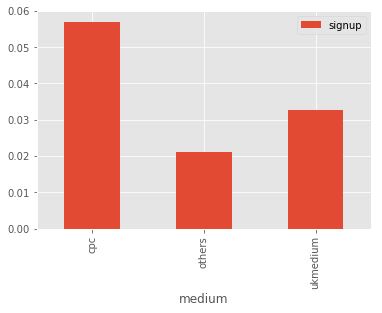

In [88]:
df_new[['medium', 'signup']].groupby(['medium']).mean().plot.bar()

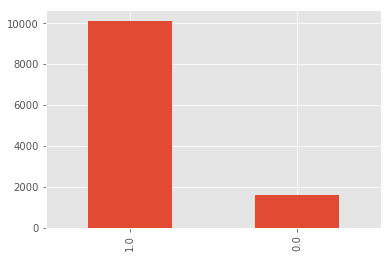

In [107]:
df_new['CN'].value_counts(dropna=False).plot.bar()

In [108]:
df_new['CN'].value_counts(dropna=False)

1.0    10123
0.0     1585
Name: CN, dtype: int64

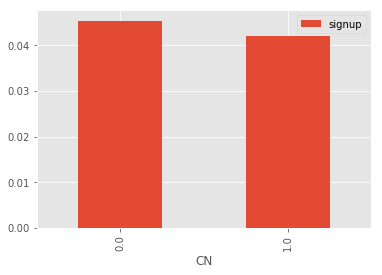

In [89]:
df_new[['CN', 'signup']].groupby(['CN']).mean().plot.bar()

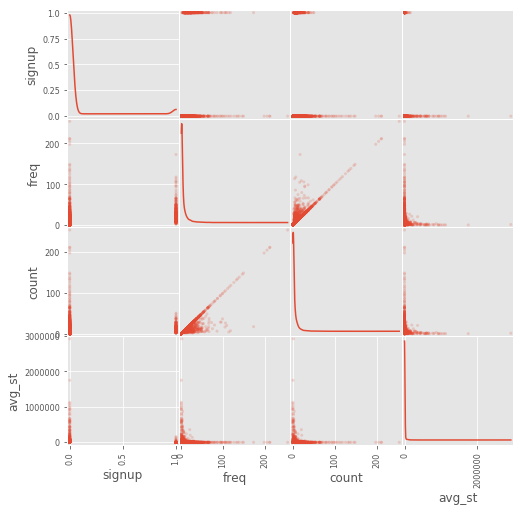

In [90]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df_new[[u'signup', u'freq', u'count',u'avg_st']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

frequency and count highly correlated!

People not in China has higher sign up rate

over 1200 users in China, try to create a column for different user interaction of the day

In [91]:
import datetime

In [92]:
def to_hour(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime('%H')
# first convert from milliseconds to seconds, and then convert format from time stamp

In [93]:
#df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
df_new['hour'] = df_new['time'].apply(lambda row: (int(to_hour(row))))

In [94]:
df_new['hour'].head()

6051     23
46921    21
7243      1
47483    22
28974     5
Name: hour, dtype: int64

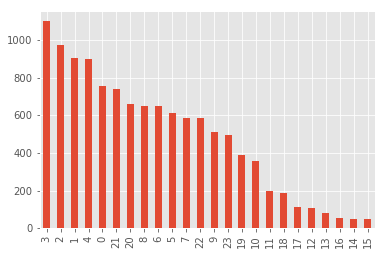

In [95]:
df_new['hour'].value_counts(dropna=False).plot.bar()

Convert UTC time to Beijing Time, work time (8-17) is (0-9)

In [96]:
df_new['worktime'] = ((df_new.hour >= 0) & (df_new.hour <= 9)) * 1

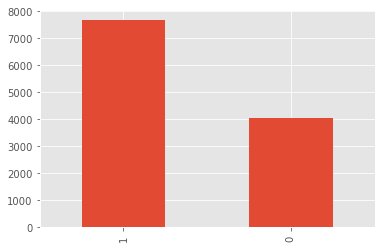

In [97]:
df_new['worktime'].value_counts(dropna=False).plot.bar()

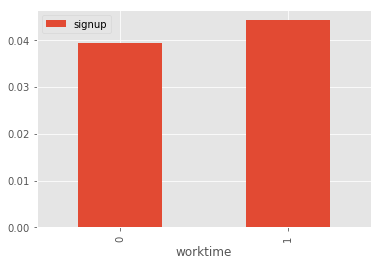

In [98]:
df_new[['worktime', 'signup']].groupby(['worktime']).mean().plot.bar()

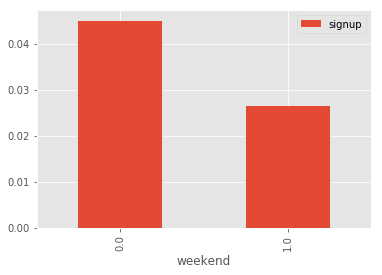

In [99]:
df_new[['weekend', 'signup']].groupby(['weekend']).mean().plot.bar()

People has same signup rate over the weekends

In [100]:
df_new.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [101]:
selected_data_csv = 'data/selected_data.csv'
df_new.to_csv(selected_data_csv, index=False)